# Лабораторная работа 5.

# Критерии качества. Кривая ошибок. Оценивание качества.

### 1. Подобрать таблицу данных с несбалансированными классами. Решить задачу классификации любым подходящим методом.

### 2. Вычислить точность, полноту, специфичность.

### 3. Построить кривую ошибок и найти площадь под ней. Построить для сравнения кривую "точность-полнота".

### 4. Разбить данные на обучающую и контрольную выборки. Построить ROC- кривую для каждой из подвыборок. Построить ROC- кривую на основе кроссвалидации.

### 5. Исследовать влияние выбора критерия обучения на AUC. Один из критериев — log loss, ещё один или два — на выбор. Как вариант: сравнить AdaBoost с градиентным бустингом.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier

## Задание 1

Набор данных о текучести клиентов в телекоммуникации, часто называемый "Telecom Churn Dataset", предназначен для анализа оттока клиентов в телекоммуникационной компании. Он содержит различные признаки, связанные с клиентами и их использованием телекоммуникационных услуг.

In [ ]:
df = pd.read_csv('/content/sample_data/churn-bigml-80.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
print(df['International plan'].unique())
print(df['Voice mail plan'].unique())
print(df['Churn'].unique())

['No' 'Yes']
['Yes' 'No']
[False  True]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
d = {'Yes' : 1, 'No' : 0}

df['International plan'] = df['International plan'].map(d)
df['Voice mail plan'] = df['Voice mail plan'].map(d)
df['Churn'] = df['Churn'].astype('int64')

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

ohe = OneHotEncoder(sparse_output=False)
encoded_state = ohe.fit_transform(df['State'].values.reshape(-1, 1))
tmp = pd.DataFrame(encoded_state, columns=['state ' + str(i) for i in range(encoded_state.shape[1])])
df = pd.concat([df, tmp], axis=1)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,state 41,state 42,state 43,state 44,state 45,state 46,state 47,state 48,state 49,state 50
0,16,128,415,0,1,25,265.1,110,45.07,197.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Решим задачу классификации

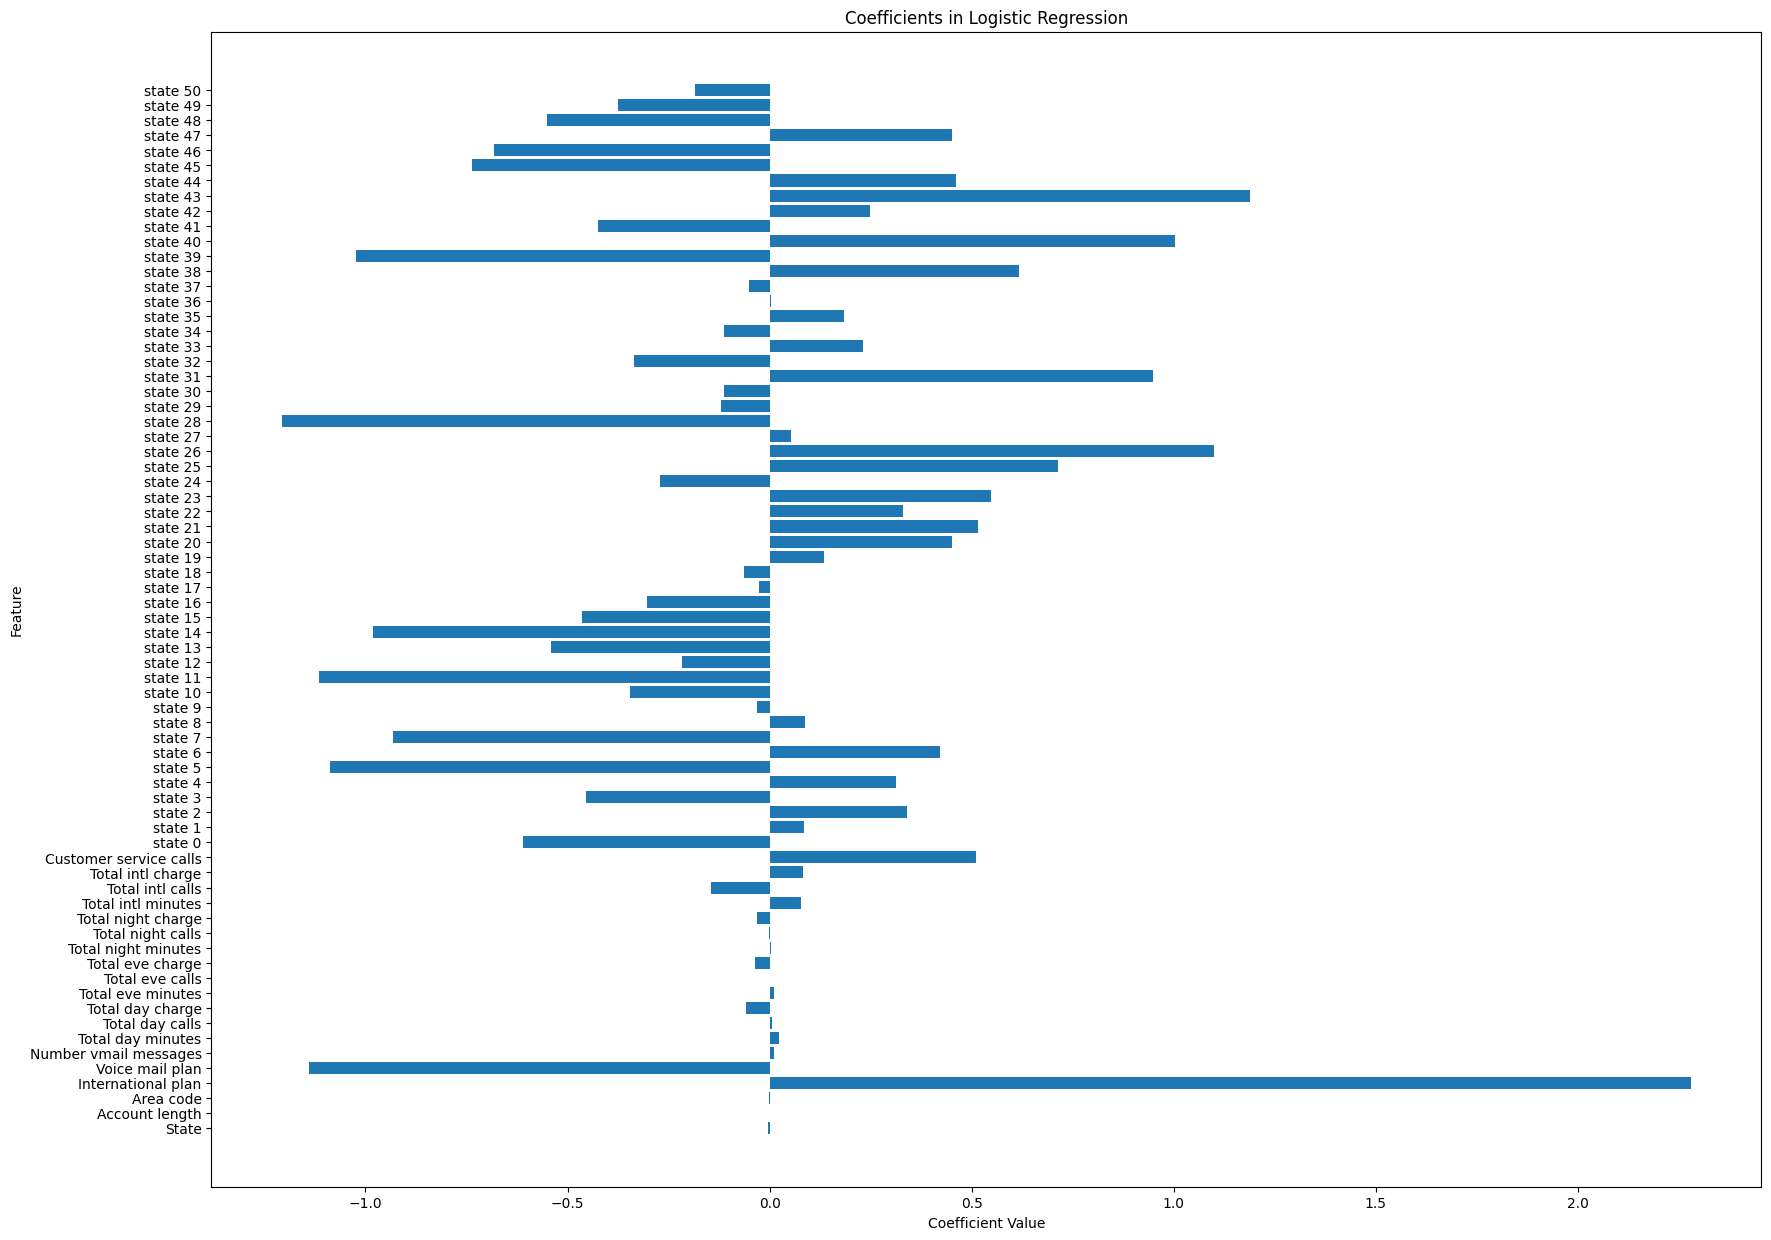

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42, max_iter=5000)
model.fit(X_train, y_train)

cnf_matrix = confusion_matrix(y_test, model.predict(X_test))

# Получение коэффициентов
coefficients = model.coef_.flatten()

# Создание графика
plt.figure(figsize=(20, 15))
features = X_train.columns
plt.barh(range(len(coefficients)), coefficients)
plt.yticks(range(len(coefficients)), features)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Coefficients in Logistic Regression")
plt.show()

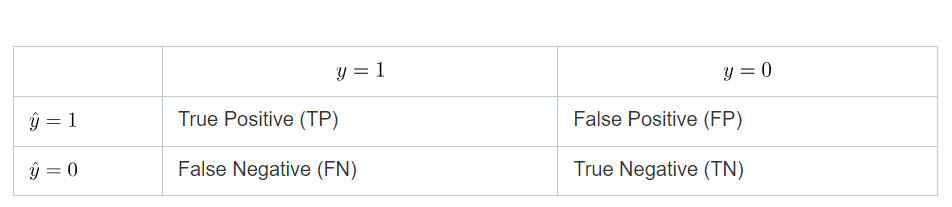

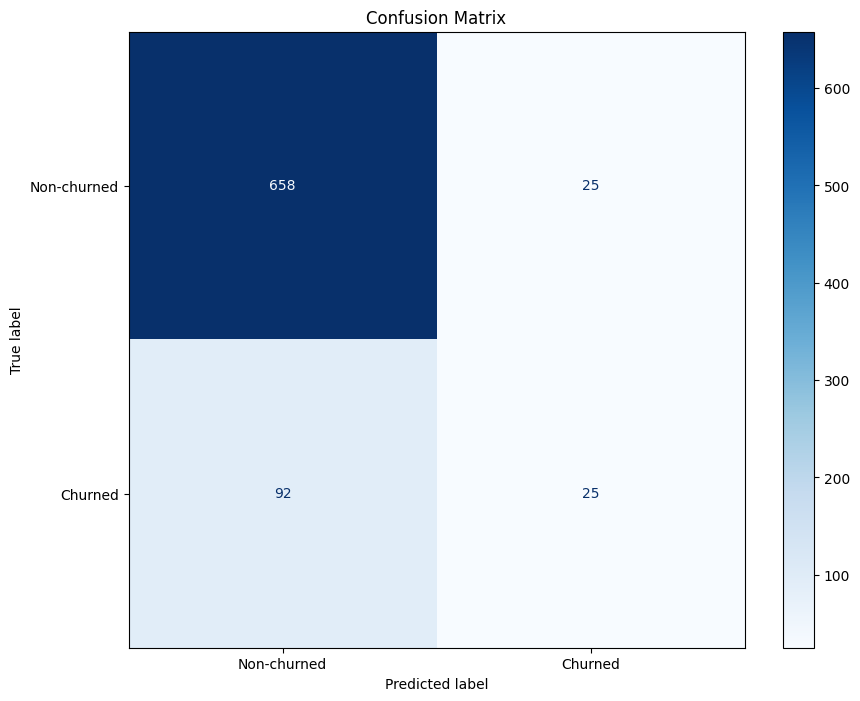

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['Non-churned', 'Churned'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

## Задание 2

Вычислим метрики

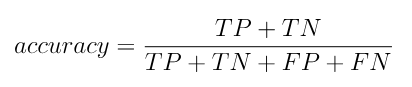

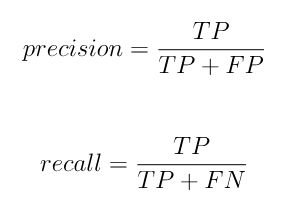

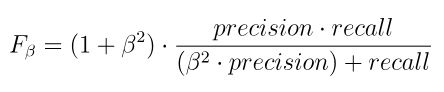

1. Точность показывает, какой процент клиентов, предсказанных моделью как "ушедшие", на самом деле ушли.
2. Полнота указывает, какую долю ушедших клиентов модель смогла правильно идентифицировать.
3. Специфичность отражает, какой процент оставшихся клиентов модель правильно классифицировала.

In [ ]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['Non-churned', 'Churned'])
print("Точность, Полнота, F1-мера")
print(report)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Специфичность:", specificity)

Точность, Полнота, F1-мера
              precision    recall  f1-score   support

 Non-churned       0.88      0.96      0.92       683
     Churned       0.50      0.21      0.30       117

    accuracy                           0.85       800
   macro avg       0.69      0.59      0.61       800
weighted avg       0.82      0.85      0.83       800

Специфичность: 0.9633967789165446


## Задание 3

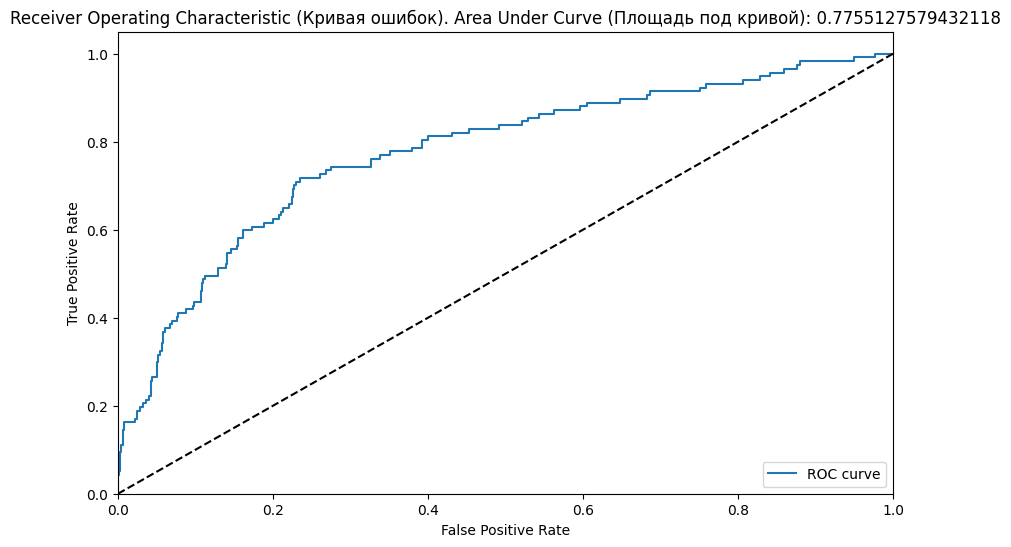

In [ ]:
y_scores = model.predict_proba(X_test)[:, 1]

# Вычисление метрик для ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Вычисление AUC
roc_auc = roc_auc_score(y_test, y_scores)

# Построение ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (Кривая ошибок). Area Under Curve (Площадь под кривой): {roc_auc}')
plt.legend(loc="lower right")
plt.show()

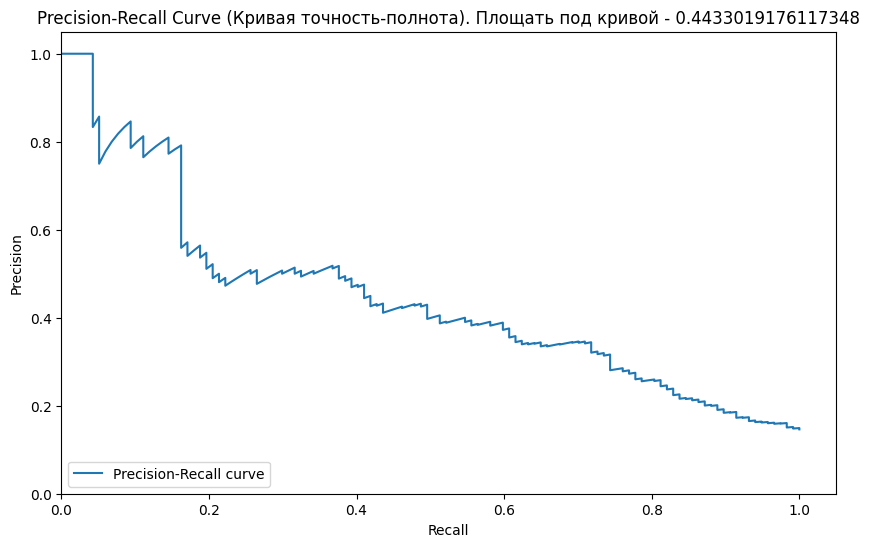

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Вычисление площади под кривой "точность-полнота"
pr_auc = auc(recall, precision)

# Построение кривой "точность-полнота"
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Кривая точность-полнота). Площать под кривой - {pr_auc}')
plt.legend(loc="lower left")
plt.show()

## Задание 4

In [ ]:
def plot_ROC_AUC(fpr, tpr, auc, sample):
  """Функция, которая строит график AUC-ROC."""
  plt.figure(figsize=(10, 6))
  plt.plot(fpr, tpr, label=f'ROC {sample} curve')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC {sample}, AUC - {auc}')
  plt.legend(loc="lower left")
  plt.show()

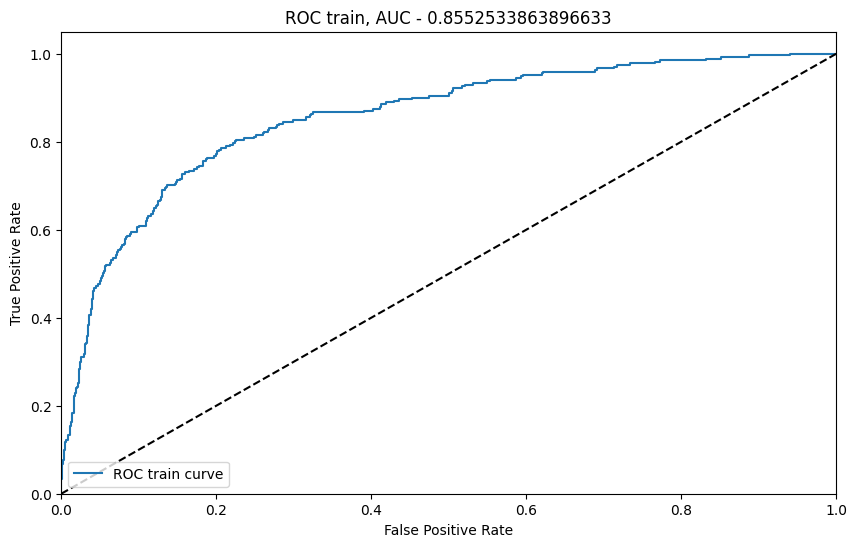

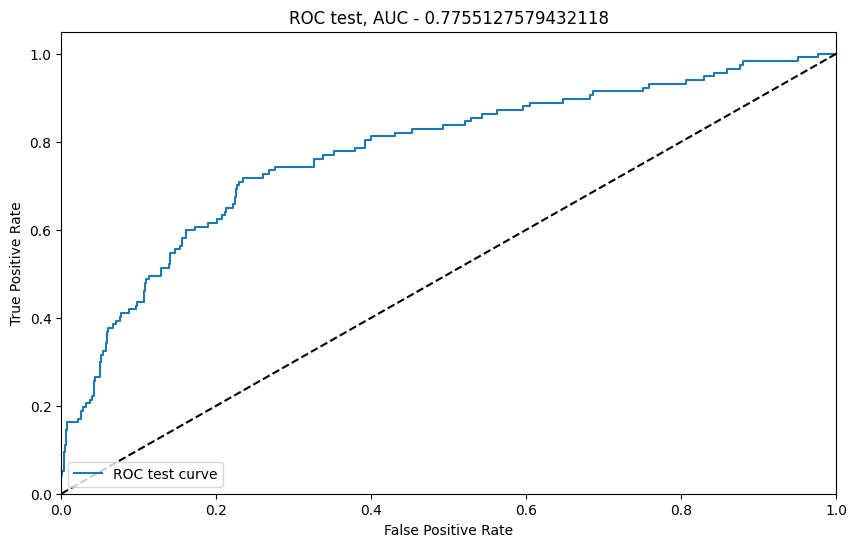

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42, max_iter=10000)
model.fit(X_train, y_train)

# Вероятности
y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]


# Вычисление метрик для ROC-кривой для обучающей выборки
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
# Вычисление AUC для обучающей выборки
roc_auc_train = roc_auc_score(y_train, y_train_pred)
# Постироение графика
plot_ROC_AUC(fpr_train, tpr_train, roc_auc_train, 'train')


# Вычисление метрик для ROC-кривой для контрольной выборки
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
# Вычисление AUC для контрольной выборки
roc_auc_test = roc_auc_score(y_test, y_test_pred)
# Постироение графика
plot_ROC_AUC(fpr_test, tpr_test, roc_auc_test, 'test')

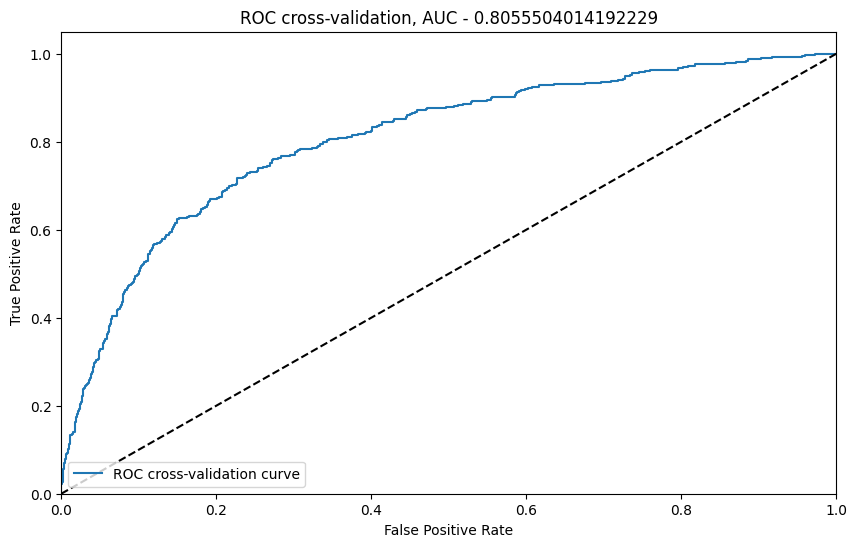

In [ ]:
# Получение вероятностей классов с кросс-валидацией
y_scores_cv = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

# Вычисление метрик для ROC-кривой
fpr_cv, tpr_cv, _ = roc_curve(y, y_scores_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)

# Постироение графика
plot_ROC_AUC(fpr_cv, tpr_cv, roc_auc_cv, "cross-validation")

## Задание 5

Немного про функцию потерь - LogLoss.
Интуитивно можно представить минимизацию LogLoss как задачу максимизации Accuracy путем штрафа за неверные предсказания. Однако необходимо отметить, что LogLoss крайне сильно штрафует за уверенность классификатора в неверном ответе.


In [ ]:
def logloss_crutch(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

print(f'Logloss при неуверенной классификации {logloss_crutch(1, 0.5)}')
print(f'Logloss при уверенной классификации и верном ответе {logloss_crutch(1, 0.9)}')
print(f'Logloss при уверенной классификации и НЕверном ответе {logloss_crutch(1, 0.1)}')

Logloss при неуверенной классификации 0.6931471805599453
Logloss при уверенной классификации и верном ответе 0.10536051565782628
Logloss при уверенной классификации и НЕверном ответе 2.3025850929940455


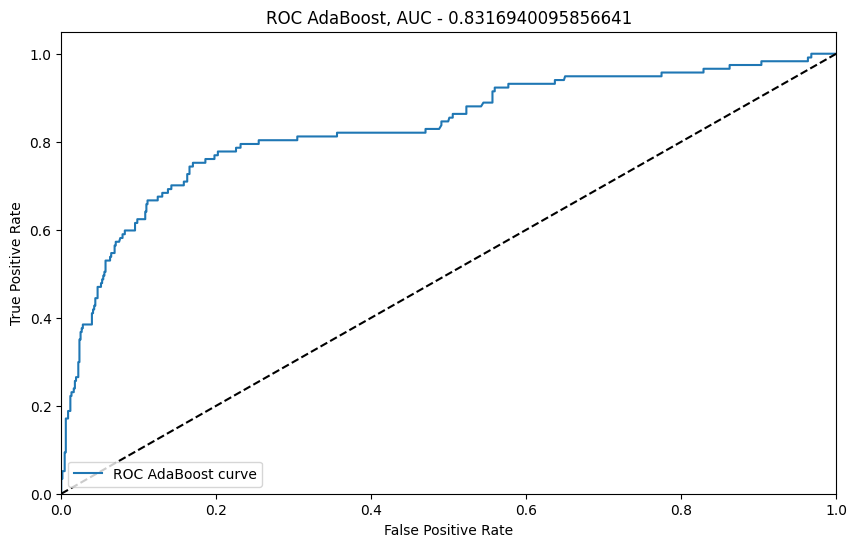

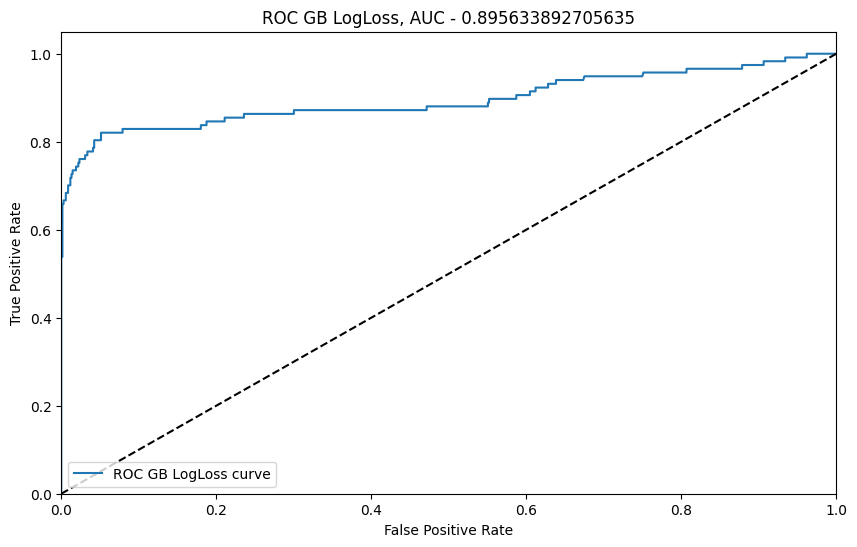

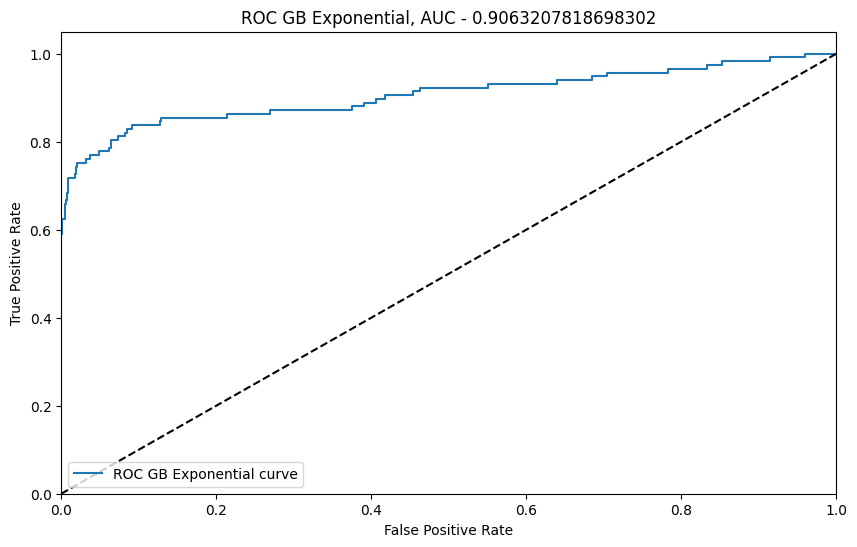

AdaBoost AUC: 0.8316940095856641
Gradient Boosting with Log Loss AUC: 0.895633892705635
Gradient Boosting with Exponential AUC: 0.9063207818698302


In [ ]:
# AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
ada_y_scores = ada_model.predict_proba(X_test)[:, 1]
fpr_ada, tpr_ada, _ = roc_curve(y_test, ada_y_scores)
ada_auc = roc_auc_score(y_test, ada_y_scores)
plot_ROC_AUC(fpr_ada, tpr_ada, ada_auc, 'AdaBoost')

# Градиентный бустинг с log loss
gb_log_model = GradientBoostingClassifier(loss='log_loss', random_state=42)
gb_log_model.fit(X_train, y_train)
gb_log_y_scores = gb_log_model.predict_proba(X_test)[:, 1]
fpr_log_loss, tpr_log_loss, _ = roc_curve(y_test, gb_log_y_scores)
log_loss_auc = roc_auc_score(y_test, gb_log_y_scores)
plot_ROC_AUC(fpr_log_loss, tpr_log_loss, log_loss_auc, 'GB LogLoss')

# Градиентный бустинг с кспоненциальной функции потерь
gb_exp_model = GradientBoostingClassifier(loss='exponential', random_state=42)
gb_exp_model.fit(X_train, y_train)
gb_exp_y_scores = gb_exp_model.predict_proba(X_test)[:, 1]
fpr_exp, tpr_exp, _ = roc_curve(y_test, gb_exp_y_scores)
gb_exp_auc = roc_auc_score(y_test, gb_exp_y_scores)
plot_ROC_AUC(fpr_exp,tpr_exp,gb_exp_auc, 'GB Exponential')

# Вывод результатов
print("AdaBoost AUC:", ada_auc)
print("Gradient Boosting with Log Loss AUC:", log_loss_auc)
print("Gradient Boosting with Exponential AUC:", gb_exp_auc)

## Дополнительные вопросы

### Как посчитать величину ROC-AUC (на примере выборки из 10 пар Предсказанное-Истинное)?

ROC curve - 0.6799999999999999


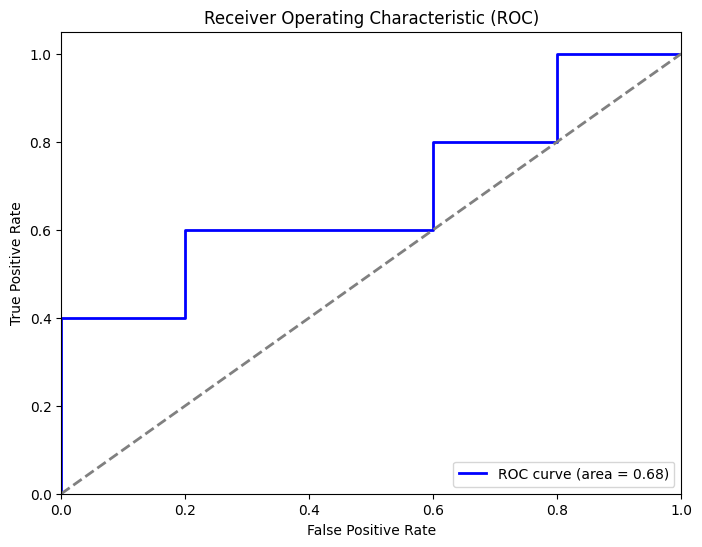

In [ ]:
# Предсказанные вероятности и истинные значения
# Выборка - просто пример.
predicted_probabilities = [0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5]
true_values = [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]

# Расчет значений для ROC кривой
fpr, tpr, thresholds = roc_curve(true_values, predicted_probabilities)

# Расчет ROC-AUC
roc_auc = roc_auc_score(true_values, predicted_probabilities)
print(f'ROC curve - {roc_auc}')

# Построение ROC кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()